In [154]:
# Import libraries
import numpy as np
import math
import matplotlib.pyplot as plt

In [155]:
true_theta = [- 10.9, 6.7]

# Generate a random line to model
def generate_y_to_predict(x):
    return true_theta[1] * x + true_theta[0]
    # return -3.6

def generate_line(lower_bound, upper_bound, intervals):
    Y = []
    X = []
    for x in range(lower_bound, upper_bound, intervals):
        X.append(x)
        Y.append(generate_y_to_predict(x))
    return X, Y

In [156]:
# Initialise our parameters at 0
def initialise_parameters():
    theta = []
    theta.append(1)
    theta.append(1)
    return theta

In [157]:
# n.b. We use lowercase 'x' and 'y' to mean a single value. We use uppercase 'X' and 'Y' to mean the array of these values

# Predict the value of y given the value of x and our parameters
def predict_y(x, theta):
    # Our model is:
    # y = b0 + b1 * x
    return theta[0] + theta[1] * x

# Predict all values of y given all values of x
def predict_Y(X, theta):
    pred_Y = []
    for x in X:
        pred_Y.append(predict_y(x, theta))
    return pred_Y

In [158]:
# Calculate the average squared error
def calculate_mean_squared_error(true_Y, pred_Y):
    squared_errors = []
    m = len(true_Y)
    for i in range(m):
        squared_errors.append(math.pow(true_Y[i] - pred_Y[i],2))
    return sum(squared_errors) / (2 * m)

In [159]:
# Calculate step update w.r.t. theta[j], d/d(theta[j]) MSE

# Calculate first part of derivative, this does not change regardless of which theta is used
def calculate_MSE_differential_wrt_theta(true_Y, pred_Y, X, is_theta_zero):
    m = len(true_Y)
    array_Y_minus_pred_Y = []
    if (is_theta_zero):
        for i in range(m):
            array_Y_minus_pred_Y.append(true_Y[i] - pred_Y[i])
    else:
        for i in range(m):
            array_Y_minus_pred_Y.append((true_Y[i] - pred_Y[i]) * X[i])
    return -1 * (1/m) * sum(array_Y_minus_pred_Y)

# Calculate step update for thetas
def update_thetas(true_Y, pred_Y, X, theta, alpha):
    theta[0] = theta[0] - alpha * calculate_MSE_differential_wrt_theta(true_Y, pred_Y, X, True)
    theta[1] = theta[1] - alpha * calculate_MSE_differential_wrt_theta(true_Y, pred_Y, X, False)
    return theta

In [160]:
# Show graph
def draw_graph(X, Y, title):
    plt.plot(X, Y)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

In [161]:
# Simple linear regression algorithm
def init_slr():
    # Generate a line for us to try and learn
    X, Y = generate_line(-25, 25, 1)
    # draw_graph(X, Y, "True Line")
    # Initialise theta parameters, we can use various different strategies but for simplicity we use zero
    theta = initialise_parameters()
    # draw_graph(X, predict_Y(X, theta), "Initial Predicted Line")
    return X, Y, theta

X, Y, theta = init_slr()

In [168]:
# Set the learning rate
alpha = 0.001
# Set the point at which we accept a line
acceptable_mse = 0.01

mse_over_time = []


# Step through one loop of the slr algorithm
def step_slr(X, Y, theta):
    # calculate predicted Y
    pred_Y = predict_Y(X, theta)
    mean_squared_error = calculate_mean_squared_error(Y, pred_Y)
    mse_over_time.append(mean_squared_error)
    # print(mean_squared_error)
    if mean_squared_error < acceptable_mse:
        print("Done!")
        draw_graph(X, Y, "True Line")
        draw_graph(X, predict_Y(X, theta), "Final Predicted Line")
    else:
        theta = update_thetas(Y, pred_Y, X, theta, alpha)
        # draw_graph(X, Y, "True Line")
        # draw_graph(X, predict_Y(X, theta), "Predicted Line")
    return theta, mean_squared_error < acceptable_mse

def perform_many_updates(X, Y, theta, num_iterations):
    for i in range(num_iterations):
        theta, is_done = step_slr(X, Y, theta)
        if is_done:
            break
    draw_graph(list(range(len(mse_over_time))), mse_over_time, "MSE over time")
    print(mse_over_time[-1])
    return theta

Done!


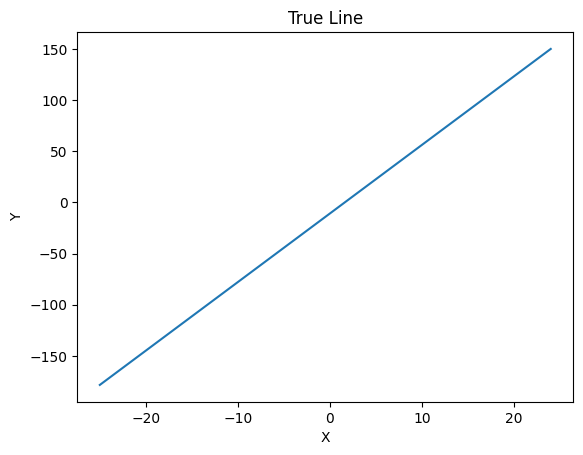

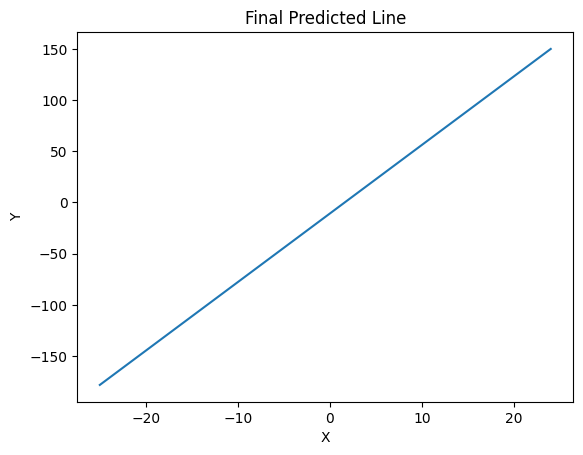

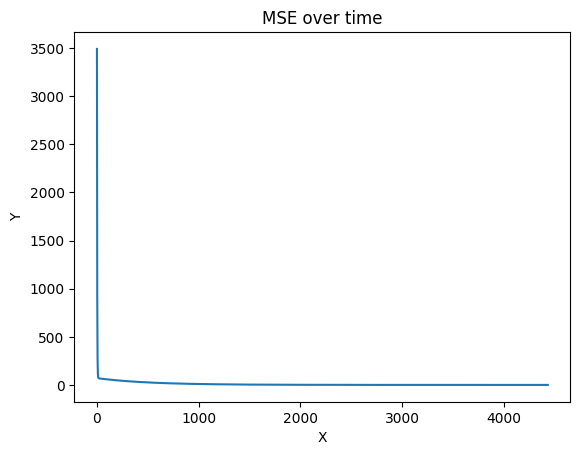

0.009998367666634284
The correct parameters:
[-10.9, 6.7]
The parameters we have learned
[-10.758505334160326, 6.700340949022363]


In [169]:
mse_over_time = []
num_iterations = 10000

X, Y, theta = init_slr()

theta = perform_many_updates(X, Y, theta, num_iterations)
print("The correct parameters:")
print(true_theta)
print("The parameters we have learned")
print(theta)